In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [42]:

df = pd.read_csv('climate.csv')
df.head(10)

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,Albania,Maize,1990,1485,121.0,16.37,36613
1,1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,4,Albania,Soybeans,1990,1485,121.0,16.37,7000
5,5,Albania,Wheat,1990,1485,121.0,16.37,30197
6,6,Albania,Maize,1991,1485,121.0,15.36,29068
7,7,Albania,Potatoes,1991,1485,121.0,15.36,77818
8,8,Albania,"Rice, paddy",1991,1485,121.0,15.36,28538
9,9,Albania,Sorghum,1991,1485,121.0,15.36,6667


In [43]:
rows , columns = df.shape

print('There are {} rows and {} columns.'.format(rows,columns))

There are 28242 rows and 8 columns.


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
 7   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ MB


In [45]:
df.describe()

,Unnamed: 0,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,14120.500000,2001.544296,1149.05598,37076.909344,20.542627,77053.332094
std,8152.907488,7.051905,709.81215,59958.784665,6.312051,84956.612897
min,0.000000,1990.000000,51.00000,0.040000,1.300000,50.000000
25%,7060.250000,1995.000000,593.00000,1702.000000,16.702500,19919.250000
50%,14120.500000,2001.000000,1083.00000,17529.440000,21.510000,38295.000000
75%,21180.750000,2008.000000,1668.00000,48687.880000,26.000000,104676.750000
max,28241.000000,2013.000000,3240.00000,367778.000000,30.650000,501412.000000


In [46]:
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64

In [47]:
df["Item"].value_counts()
# no of occurances inside a column 

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [48]:
# partitioning the data frames 
df0 = df[df['Item'] == 'Potatoes']
df1 = df[df['Item'] == 'Maize']
df2 = df[df['Item'] == 'Wheat']
df3 = df[df['Item'] == 'Rice, paddy']
df4 = df[df['Item'] == 'Soybeans']
df5 = df[df['Item'] == 'Sorghum']
df6 = df[df['Item'] == 'Sweet potatoes']
df7 = df[df['Item'] == 'Cassava']
df8 = df[df['Item'] == 'Yams']
df9 = df[df['Item'] == 'Plantains and others']

In [49]:
df2.head()

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
5,5,Albania,Wheat,1990,1485,121.0,16.37,30197
11,11,Albania,Wheat,1991,1485,121.0,15.36,20698
17,17,Albania,Wheat,1992,1485,121.0,16.06,24388
22,22,Albania,Wheat,1993,1485,121.0,16.05,29976
26,26,Albania,Wheat,1994,1485,201.0,16.96,24745


Data Visualisation Here

This is for the rainfall vs yeild 

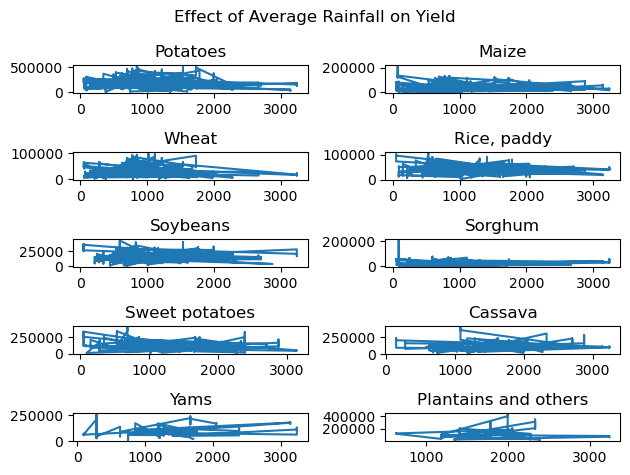

In [50]:
figure, axis = plt.subplots(5, 2)
figure.suptitle('Effect of Average Rainfall on Yield')
axis[0,0].plot(df0["average_rain_fall_mm_per_year"], df0["hg/ha_yield"])
axis[0,0].set_title('Potatoes')
axis[0,1].plot(df1["average_rain_fall_mm_per_year"], df1["hg/ha_yield"])
axis[0,1].set_title('Maize')
axis[1,0].plot(df2["average_rain_fall_mm_per_year"], df2["hg/ha_yield"])
axis[1,0].set_title('Wheat')
axis[1,1].plot(df3["average_rain_fall_mm_per_year"], df3["hg/ha_yield"])
axis[1,1].set_title('Rice, paddy')
axis[2,0].plot(df4["average_rain_fall_mm_per_year"], df4["hg/ha_yield"])
axis[2,0].set_title('Soybeans')
axis[2,1].plot(df5["average_rain_fall_mm_per_year"], df5["hg/ha_yield"])
axis[2,1].set_title('Sorghum')
axis[3,0].plot(df6["average_rain_fall_mm_per_year"], df6["hg/ha_yield"])
axis[3,0].set_title('Sweet potatoes')
axis[3,1].plot(df7["average_rain_fall_mm_per_year"], df7["hg/ha_yield"])
axis[3,1].set_title('Cassava')
axis[4,0].plot(df8["average_rain_fall_mm_per_year"], df8["hg/ha_yield"])
axis[4,0].set_title('Yams')
axis[4,1].plot(df9["average_rain_fall_mm_per_year"], df9["hg/ha_yield"])
axis[4,1].set_title('Plantains and others')
plt.tight_layout()
# to reduce overlapping and automatically adjust
plt.show()

temperature vs yeild 

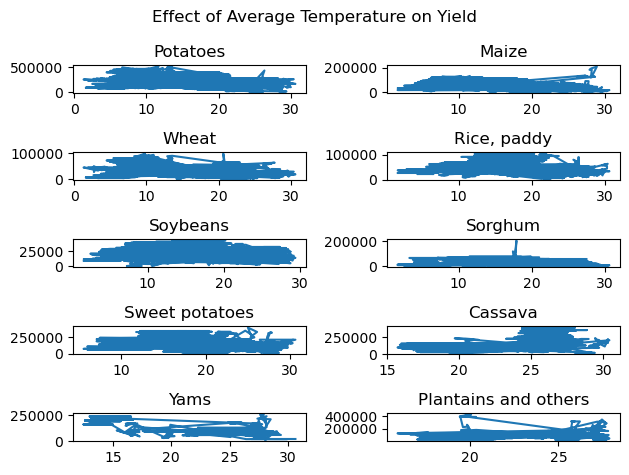

In [51]:
figure, axis = plt.subplots(5, 2)
figure.suptitle('Effect of Average Temperature on Yield')
axis[0,0].plot(df0["avg_temp"], df0["hg/ha_yield"])
axis[0,0].set_title('Potatoes')
axis[0,1].plot(df1["avg_temp"], df1["hg/ha_yield"])
axis[0,1].set_title('Maize')
axis[1,0].plot(df2["avg_temp"], df2["hg/ha_yield"])
axis[1,0].set_title('Wheat')
axis[1,1].plot(df3["avg_temp"], df3["hg/ha_yield"])
axis[1,1].set_title('Rice, paddy')
axis[2,0].plot(df4["avg_temp"], df4["hg/ha_yield"])
axis[2,0].set_title('Soybeans')
axis[2,1].plot(df5["avg_temp"], df5["hg/ha_yield"])
axis[2,1].set_title('Sorghum')
axis[3,0].plot(df6["avg_temp"], df6["hg/ha_yield"])
axis[3,0].set_title('Sweet potatoes')
axis[3,1].plot(df7["avg_temp"], df7["hg/ha_yield"])
axis[3,1].set_title('Cassava')
axis[4,0].plot(df8["avg_temp"], df8["hg/ha_yield"])
axis[4,0].set_title('Yams')
axis[4,1].plot(df9["avg_temp"], df9["hg/ha_yield"])
axis[4,1].set_title('Plantains and others')
plt.tight_layout()
plt.show()

pestiside vs yeild 

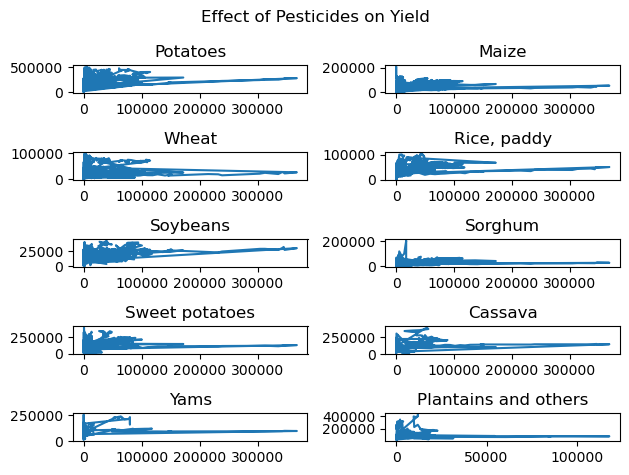

In [52]:
figure, axis = plt.subplots(5, 2)
# created a 5x2 plot for the graph  
# This variable is a NumPy array containing references to each individual subplot. It has the shape (5, 2), corresponding to the 5 rows and 2 columns of the subplot grid.
figure.suptitle('Effect of Pesticides on Yield')
axis[0,0].plot(df0["pesticides_tonnes"], df0["hg/ha_yield"])
axis[0,0].set_title('Potatoes')
axis[0,1].plot(df1["pesticides_tonnes"], df1["hg/ha_yield"])
axis[0,1].set_title('Maize')
axis[1,0].plot(df2["pesticides_tonnes"], df2["hg/ha_yield"])
axis[1,0].set_title('Wheat')
axis[1,1].plot(df3["pesticides_tonnes"], df3["hg/ha_yield"])
axis[1,1].set_title('Rice, paddy')
axis[2,0].plot(df4["pesticides_tonnes"], df4["hg/ha_yield"])
axis[2,0].set_title('Soybeans')
axis[2,1].plot(df5["pesticides_tonnes"], df5["hg/ha_yield"])
axis[2,1].set_title('Sorghum')
axis[3,0].plot(df6["pesticides_tonnes"], df6["hg/ha_yield"])
axis[3,0].set_title('Sweet potatoes')
axis[3,1].plot(df7["pesticides_tonnes"], df7["hg/ha_yield"])
axis[3,1].set_title('Cassava')
axis[4,0].plot(df8["pesticides_tonnes"], df8["hg/ha_yield"])
axis[4,0].set_title('Yams')
axis[4,1].plot(df9["pesticides_tonnes"], df9["hg/ha_yield"])
axis[4,1].set_title('Plantains and others')
plt.tight_layout()
#  to prevent overlapping elements
plt.show()

In [53]:
data = df.drop(["Year"], axis=1)  
# removed the year column 

In [54]:
data.head(10)

,Unnamed: 0,Area,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,Albania,Maize,1485,121.0,16.37,36613
1,1,Albania,Potatoes,1485,121.0,16.37,66667
2,2,Albania,"Rice, paddy",1485,121.0,16.37,23333
3,3,Albania,Sorghum,1485,121.0,16.37,12500
4,4,Albania,Soybeans,1485,121.0,16.37,7000
5,5,Albania,Wheat,1485,121.0,16.37,30197
6,6,Albania,Maize,1485,121.0,15.36,29068
7,7,Albania,Potatoes,1485,121.0,15.36,77818
8,8,Albania,"Rice, paddy",1485,121.0,15.36,28538
9,9,Albania,Sorghum,1485,121.0,15.36,6667


In [55]:
data = pd.get_dummies(data, columns=['Area',"Item"])
# converted the categorical data into numerical using one hot encoding using the .get_dummies function

In [56]:
data.head(10)

,Unnamed: 0,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0,1485,121.0,16.37,36613,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,1485,121.0,16.37,66667,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,1485,121.0,16.37,23333,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,3,1485,121.0,16.37,12500,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4,1485,121.0,16.37,7000,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,5,1485,121.0,16.37,30197,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,6,1485,121.0,15.36,29068,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,7,1485,121.0,15.36,77818,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,8,1485,121.0,15.36,28538,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9,9,1485,121.0,15.36,6667,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [57]:
X = data.loc[:, data.columns != 'hg/ha_yield']
# here we take all the data from row and columns which is not equal hg/ha values as x is independent so all independent factors will be combined here 
Y = data['hg/ha_yield']
# here we put the dependent data that is yeild

In [58]:
X.head(10)

,Unnamed: 0,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0,1485,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,1485,121.0,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,1485,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,3,1485,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4,1485,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,5,1485,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,6,1485,121.0,15.36,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,7,1485,121.0,15.36,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,8,1485,121.0,15.36,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9,9,1485,121.0,15.36,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [59]:
Y.head(10)

0    36613
1    66667
2    23333
3    12500
4     7000
5    30197
6    29068
7    77818
8    28538
9     6667
Name: hg/ha_yield, dtype: int64

In [60]:
x_max = X.max()
X = X.divide(x_max)
# Normalization so that the scaleup factor move to 1 
X.describe()

,Unnamed: 0,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
count,28242.0,28242.000000,28242.000000,28242.000000,28242.0,28242.0,28242.0,28242.0,28242.0,28242.0,...,28242.0,28242.0,28242.0,28242.0,28242.0,28242.0,28242.0,28242.0,28242.0,28242.0
unique,28242.0,100.000000,1673.000000,1831.000000,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,0.0,0.334259,0.004342,0.887439,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,1.0,4048.000000,720.000000,90.000000,28143.0,28128.0,28078.0,27874.0,28179.0,27276.0,...,26197.0,24121.0,27686.0,23966.0,24854.0,25203.0,25019.0,25352.0,24385.0,27395.0


In [61]:
print(X.shape)
print(Y.shape)

(28242, 115)
(28242,)


Visalisation ends here !

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
print(x_train.shape)
print(y_train.shape)

(22593, 115)
(22593,)


In [64]:
ApnaModel = RandomForestRegressor(n_estimators = 100, random_state = 0)
# 100 decision trees 

ApnaModel.fit(x_train, y_train)
print('Model trained!')

Model trained!


In [65]:
print('Model score {}'.format(ApnaModel.score(x_test, y_test)))

Model score 0.9874446033896592


In [66]:
# print('Boom our accuracy is {}'.format((ApnaModel.score(x_test, y_test))*100))

In [67]:
arr = pd.DataFrame(y_test)
# creatign a new dataframe for iteranting in the y_test 

In [68]:
arr["yield_predicted"]= ApnaModel.predict(x_test)

In [69]:
arr.head(10)

,hg/ha_yield,yield_predicted
25564,69220,71835.88
18113,20000,24527.11
25607,51206,47800.71
6815,166986,162013.47
18144,56319,54822.81
12680,26163,26163.00
3474,30708,30704.74
22381,109771,109939.60
20656,241650,236741.54
23170,47500,45934.47


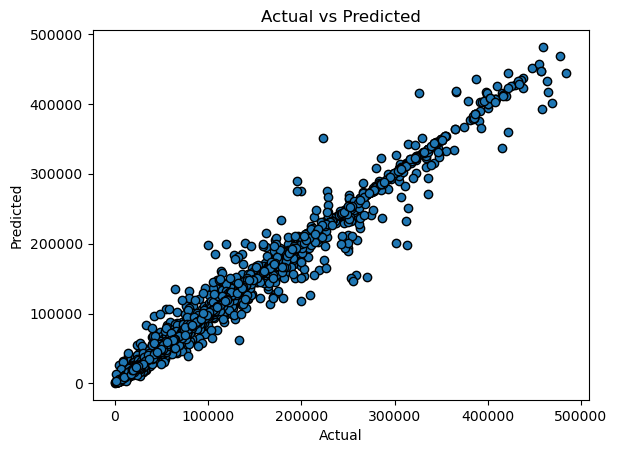

In [70]:
fig, ax = plt.subplots() 
# new figure (fig) and a single subplot (ax) within it. This subplot will be used to draw the scatter plot.
ax.scatter(arr["hg/ha_yield"], arr["yield_predicted"],edgecolors=(0, 0, 0))
# x axis actual y axis predicted values 
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [72]:


import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae = mean_absolute_error(arr["hg/ha_yield"], arr["yield_predicted"])
print("Mean Absolute Error (MAE): {:.2f}".format(mae))

# Calculate MSE
mse = mean_squared_error(arr["hg/ha_yield"], arr["yield_predicted"])
print("Mean Squared Error (MSE): {:.2f}".format(mse))

# Calculate R-squared
r2 = r2_score(arr["hg/ha_yield"], arr["yield_predicted"])
print("Coefficient of Determination (R-squared): {:.2f}".format(r2))

Mean Absolute Error (MAE): 3478.55
Mean Squared Error (MSE): 91072728.48
Coefficient of Determination (R-squared): 0.99
